In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import matplotlib.cm as mplcm
import matplotlib.colors as colors
from sklearn.model_selection import TimeSeriesSplit
from fbprophet import Prophet

In [24]:
test_x = np.linspace(start=1, stop=10)

In [25]:
test_y = np.exp(test_x)

In [32]:
test = pd.DataFrame({'ds': test_x, 'y': test_y})

In [33]:
test

,ds,y
0,1.000000,2.718282
1,1.183673,3.266351
2,1.367347,3.924924
3,1.551020,4.716280
4,1.734694,5.667193
5,1.918367,6.809831
6,2.102041,8.182853
7,2.285714,9.832707
8,2.469388,11.815211
9,2.653061,14.197434


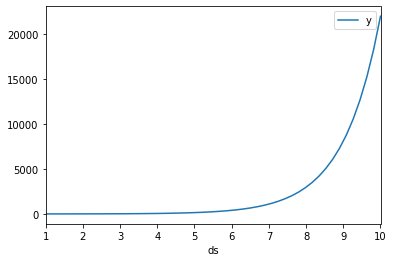

In [34]:
test.plot(x='ds',y='y');

In [39]:
test_dates= pd.date_range(start='2018-01-01', periods=50, freq='M')

In [40]:
test2 = pd.DataFrame({'ds': test_dates, 'y': test_y})

In [41]:
test2

,ds,y
0,2018-01-31,2.718282
1,2018-02-28,3.266351
2,2018-03-31,3.924924
3,2018-04-30,4.716280
4,2018-05-31,5.667193
5,2018-06-30,6.809831
6,2018-07-31,8.182853
7,2018-08-31,9.832707
8,2018-09-30,11.815211
9,2018-10-31,14.197434


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


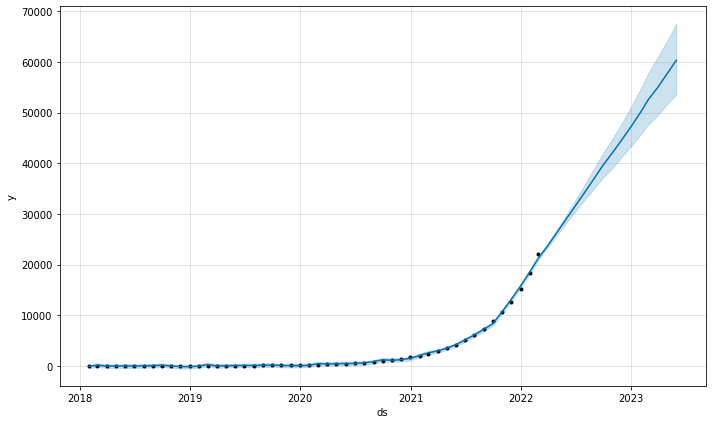

In [51]:
m = Prophet(interval_width=0.95, 
                    #n_changepoints=250, 
                    changepoint_range=0.9, 
                    changepoint_prior_scale=0.25)
        
m.fit(test2)
future = m.make_future_dataframe(periods=15, freq='M')
forecast = m.predict(future)
fig = m.plot(forecast)
# ds.extend(forecast['ds'].values)
# yhat_lower.extend(forecast['yhat_lower'].values)
# yhat.extend(forecast['yhat'].values)
# yhat_upper.extend(forecast['yhat_upper'].values)
# zipcode.extend(np.repeat(zippy, forecast.shape[0]))
